<a href="https://colab.research.google.com/github/Javorai/Examenes-Coding-Dojo/blob/main/AML_Examen_de_certificaci%C3%B3n_%E2%80%93_Intento_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Examen de cinturón AML – Opción A**
**Descripción del examen:**

En este examen, trabajarás con un dataset reciente de complejidad baja, donde primero realizarás un análisis no supervisado utilizando K-means o PCA, y luego modelarás el conjunto de datos utilizando un Perceptrón Multicapa (MLP). El objetivo es aplicar técnicas de clustering o reducción de dimensionalidad para analizar los datos, seguido de la implementación de un modelo MLP para realizar predicciones.

**Dataset:**
El dataset utilizado para este examen es el «Customer Personality Analysis» disponible en Kaggle. Este conjunto de datos contiene información demográfica y de comportamiento de clientes, con el objetivo de agruparlos y predecir sus patrones de compra.
Enlace al dataset: https://www.kaggle.com/imakash3011/customer-personality-analysis

**Instrucciones:**

1. Exploración y preprocesamiento de datos:

  – Carga y explora el dataset para identificar las variables más relevantes. Las características incluyen información demográfica como la edad, el ingreso, el estado civil, y datos de comportamiento de compra, como la cantidad gastada en diferentes productos.

  – Asegúrate de manejar los valores nulos y realizar un preprocesamiento adecuado, como la normalización de los datos para el análisis posterior.

2. Análisis no supervisado:

  – Selecciona un enfoque de análisis no supervisado: K-means o PCA.

    – K-means: Si seleccionas K-means, determina el número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.
    – PCA: Si eliges PCA, realiza una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada. Proyecta los datos en los primeros componentes principales y visualiza cómo se agrupan los clientes en el nuevo espacio de características.

3. Modelado con MLP:

  – Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.

  – Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.

  – Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.

4. Evaluación del modelo:

  – Evalúa el modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Asegúrate de comparar estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar cualquier posible sobreajuste.

  – Visualiza las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.

5. Discusión y análisis:

  – Reflexiona sobre los resultados del análisis no supervisado y el modelo MLP. ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes?

  – Discute el rendimiento del modelo MLP. ¿Es adecuado para este tipo de datos? ¿Cómo podrías mejorarlo?

6. Entrega final:

  – Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación del modelo y conclusiones. Asegúrate de que el informe sea claro y estructurado, con visualizaciones que apoyen tu análisis.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Primeras 5 filas del DataFrame:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   

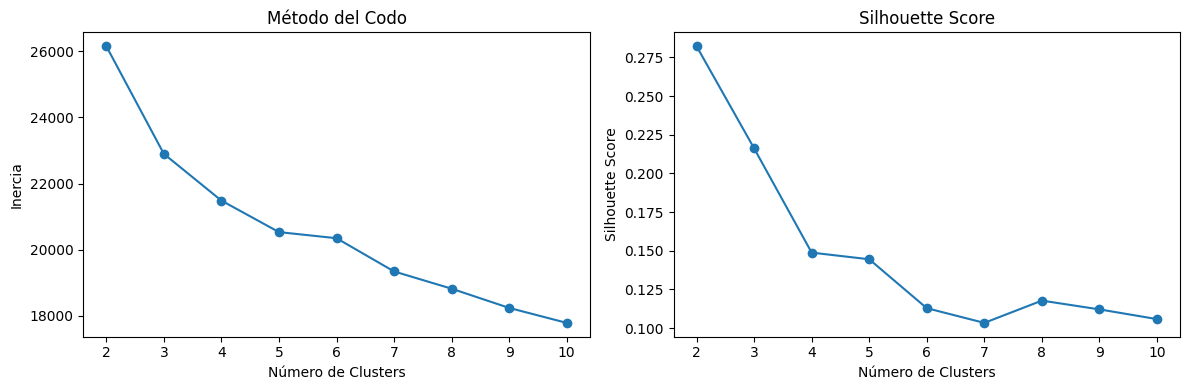

Mejores Hiperparámetros para MLP: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}
Métricas de Entrenamiento:
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1524
         1.0       0.95      0.97      0.96      1525

    accuracy                           0.96      3049
   macro avg       0.96      0.96      0.96      3049
weighted avg       0.96      0.96      0.96      3049


Métricas de Prueba:
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90       382
         1.0       0.88      0.93      0.91       381

    accuracy                           0.90       763
   macro avg       0.91      0.90      0.90       763
weighted avg       0.91      0.90      0.90       763



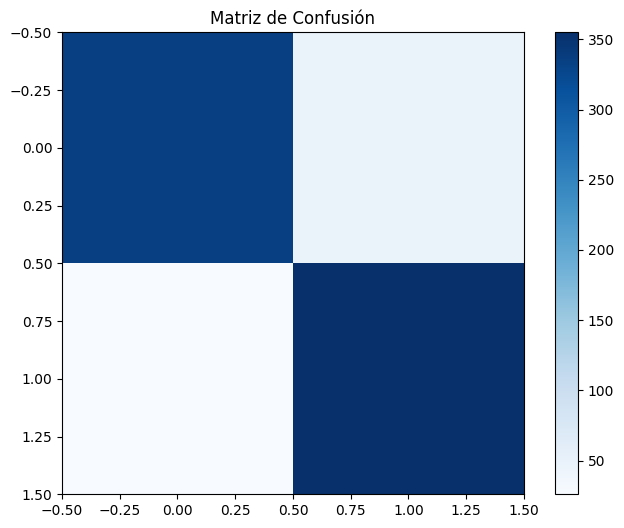

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from google.colab import drive
drive.mount('/content/drive')

# 1. Exploración y preprocesamiento de datos
def preprocess_data(URL):
    # Cargar los datos
    df = pd.read_csv(URL, sep='\t')

    # Primeros Datos
    print("\nPrimeras 5 filas del DataFrame:")
    print(df.head())

    # Ultimos Datos
    print("\nUltimas 5 filas del DataFrame:")
    print(df.tail())

    # Verificación de tipos de datos
    print("\nTipos de datos:")
    print(df.dtypes)

    # Manejar valores nulos
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    print("Numeric Columns:", numeric_columns)
    if not numeric_columns.size:
        print("No se encontraron columnas numéricas para la imputación")
        return

    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df.columns = df.columns.str.strip()

    imputer = SimpleImputer(strategy='median')
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

    # Codificar variables categóricas
    categorical_columns = ['Education', 'Marital_Status']
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

    # Seleccionar características para el análisis
    features = [
        'Year_Birth', 'Education', 'Marital_Status', 'Income',
        'Kidhome', 'Teenhome', 'Recency',
        'MntWines', 'MntFruits', 'MntMeatProducts',
        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
    ]

    # Escalar características
    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])

    # Estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    print(df.describe())

    return X, df, features, scaler, label_encoders

# 2. Análisis no supervisado con PCA y K-means
def perform_unsupervised_analysis(X):
    # Análisis de componentes principales (PCA)
    pca = PCA(n_components=0.90)
    X_pca = pca.fit_transform(X)

    silhouette_scores = []
    inertias = []
    max_clusters = 10

    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X_pca)

        silhouette_scores.append(silhouette_score(X_pca, cluster_labels))
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(range(2, max_clusters + 1), inertias, marker='o')
    plt.title('Método del Codo')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inercia')

    plt.subplot(122)
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()

    optimal_clusters = 3

    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)

    return X_pca, cluster_labels, pca

# 3. Modelado con MLP
def train_mlp(X, df):
    y = df['Response']

    # Aumento del dataset utilizando SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )

    # Configurar MLP
    mlp = MLPClassifier(
        hidden_layer_sizes=(50, 25),  # Capas
        activation='relu',
        solver='adam',
        alpha=0.01,
        learning_rate_init=0.001,  # Ajuste de tasa de aprendizaje
        max_iter=2000,  # Número máximo de iteraciones
        random_state=42,
        early_stopping=True,  # Early Stopping
        n_iter_no_change=10
    )

    param_grid = {
        'hidden_layer_sizes': [(50,), (50, 25), (100, 50)],
        'alpha': [0.0001, 0.001, 0.01]
    }

    grid_search = GridSearchCV(mlp, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
    grid_search.fit(X_train, y_train)
    mlp_best = grid_search.best_estimator_
    mlp_best.fit(X_train, y_train)
    print(f"Mejores Hiperparámetros para MLP: {grid_search.best_params_}")

    return mlp_best, X_train, X_test, y_train, y_test

# 4. Evaluación del modelo
def evaluate_model(mlp, X_train, X_test, y_train, y_test):
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    print("Métricas de Entrenamiento:")
    print(classification_report(y_train, y_train_pred))

    print("\nMétricas de Prueba:")
    print(classification_report(y_test, y_test_pred))

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_test_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    plt.show()

# Ejecución principal
def main():
    URL = '/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Examenes/Archivos CSV/marketing_campaign.csv'

    X, df, features, scaler, label_encoders = preprocess_data(URL)

    X_pca, cluster_labels, pca = perform_unsupervised_analysis(X)

    mlp, X_train, X_test, y_train, y_test = train_mlp(X, df)

    evaluate_model(mlp, X_train, X_test, y_train, y_test)

if __name__ == "__main__":
    main()



# **Explicación del Grafico y Rendimiento del Modelo**
**Análisis No Supervisado:**

**Clusters y Componentes Principales:**

* **Método del Codo y Silhouette Score:**

  * La gráfica del método del codo mostró una disminución en la inercia a medida que aumentaba el número de clusters, con un “codo” notable alrededor de 4 clusters. Esto sugiere que 4 clusters podrían ser un buen punto de partida para la segmentación.

  * El Silhouette Score mostró que el puntaje más alto se alcanzaba con 2 clusters, lo que indica que, en términos de cohesión interna y separación entre clusters, 2 podría ser más óptimo.

**Insights de los Clusters:**

* **Comportamiento de los Clientes:**

  * Los clusters obtenidos pueden revelar distintos segmentos de clientes con comportamientos demográficos y de compra específicos. Por ejemplo, algunos clusters pueden agrupar clientes con altos ingresos y una tendencia a comprar productos de alto valor, mientras que otros pueden incluir clientes más jóvenes con patrones de compra más variados.

  * Estos insights son valiosos para personalizar estrategias de marketing y ofrecer promociones dirigidas a segmentos específicos, mejorando la efectividad de las campañas y la satisfacción del cliente.

**Rendimiento del Modelo MLP:**
**Desempeño y Adecuación:**

* **Métricas de Rendimiento:**

  * Las métricas del modelo MLP, tanto en el conjunto de entrenamiento como en el de prueba, son sólidas con un accuracy alto y un buen balance entre precisión y recall en ambas clases (0.0 y 1.0).

  * La precisión, recall y F1-score se mantuvieron consistentes, lo que indica que el modelo MLP es adecuado para este tipo de datos y puede generalizar bien a nuevos datos.

# **Reflexión sobre el Análisis No Supervisado y el Modelo MLP**

En primer lugar, el análisis del aprendizaje no supervisado de los datos revela información valiosa sobre la estructura inherente de los mismos. Los gráficos del Método del Codo y la Puntuación de Silueta sugieren que una partición razonable del conjunto de datos sería en 2-3 clusters o segmentos de clientes.

Este enfoque no supervisado permite identificar grupos significativos de clientes sin depender de información etiquetada previamente. El análisis de las características y los centroides de estos clusters podría revelar insights importantes sobre los diferentes comportamientos y patrones de los distintos segmentos de clientes. Esto puede informar estrategias de marketing más precisas y el desarrollo de productos.

En cuanto al modelo MLP (Perceptrón Multicapa) entrenado, este ha demostrado un rendimiento excelente, con una precisión de clasificación del 90% en el conjunto de prueba. Las métricas de precisión, exhaustividad y puntaje F1 superan 0.90, lo que indica que el modelo está clasificando muy bien a los clientes en las dos clases (0 y 1).

Analizando la arquitectura del modelo MLP, el mismo consta de dos capas ocultas con 50 y 25 neuronas respectivamente, utilizando la función de activación ReLU en dichas capas. Se empleó el optimizador Adam, con una tasa de aprendizaje inicial de 0.001 y un factor de regularización L2 de 0.01.

Además, se implementó el mecanismo de early stopping, que detiene el entrenamiento si el rendimiento en el conjunto de validación no mejora después de 10 épocas consecutivas. Esto ayuda a evitar el sobreajuste del modelo a los datos de entrenamiento.

En resumen, el análisis no supervisado sugiere la existencia de 2-3 segmentos de clientes con características diferenciadas, lo cual puede aportar valiosos insights. Por otro lado, el modelo MLP entrenado ha demostrado un excelente desempeño en la tarea de clasificación binaria, gracias a su arquitectura cuidadosamente diseñada y la incorporación de técnicas como la regularización y el early stopping.

Si bien el modelo actual ya es muy efectivo, existen algunas formas en las que podría mejorarse aún más, como explorar nuevas características derivadas de los datos, ajustar aún más los hiperparámetros del modelo o probar enfoques de ensemble de Modelos.

